In [1]:
import matplotlib.pyplot as plt
import os, re, pickle
import scipy.io
from collections import defaultdict
import numpy as np

import pandas as pd

def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def nested_dict(n):
    if n == 1:
        return defaultdict(lambda: np.ndarray(0))
    else:
        return defaultdict(lambda: nested_dict(n-1))

### Whole-Image Human Attention Maps

In [49]:
human_attention_path = {
    "DET":{
        'vehicle': '/mnt/h/OneDrive - The University Of Hong Kong/bdd/attention_maps/240107 Veh DET/whole_image',
        'human':'/mnt/h/OneDrive - The University Of Hong Kong/bdd/attention_maps/240107 Hum DET/whole_image',
    },
    "DET-GrpF":{
        'vehicle':'/mnt/h/OneDrive - The University Of Hong Kong/bdd/attention_maps/240107 Veh DET/grp1',
        'human':'/mnt/h/OneDrive - The University Of Hong Kong/bdd/attention_maps/240107 Hum DET/grp1',
    },
    "DET-GrpE":{
        'vehicle':'/mnt/h/OneDrive - The University Of Hong Kong/bdd/attention_maps/240107 Veh DET/grp2',
        'human':'/mnt/h/OneDrive - The University Of Hong Kong/bdd/attention_maps/240107 Hum DET/grp2',
    },
    # "DET-Cropped":{
    #     'vehicle': '/mnt/h/OneDrive - The University Of Hong Kong/bdd/attention_maps/231206 Veh DET/cropped',
    #     'human':'/mnt/h/OneDrive - The University Of Hong Kong/bdd/attention_maps/231206 Hum DET/cropped',
    # },
    "EXP":{
        'vehicle':'/mnt/h/OneDrive - The University Of Hong Kong/bdd/results/explanation/231018_vehicle_whole_screen_vb_fixed_pos/human_saliency_map',
        'human':'/mnt/h/OneDrive - The University Of Hong Kong/bdd/results/explanation/231018_human_whole_screen_vb_fixed_pos/human_saliency_map',
    },
    "EXP-GrpF":{
        'vehicle':'/mnt/h/OneDrive - The University Of Hong Kong/bdd/attention_maps/240107 Veh EXP/grp1',
        'human':'/mnt/h/OneDrive - The University Of Hong Kong/bdd/attention_maps/240107 Hum EXP/grp2', #NOTE: flip grp order to have a consistent EF naming
    },
    "EXP-GrpE":{
        'vehicle':'/mnt/h/OneDrive - The University Of Hong Kong/bdd/attention_maps/240107 Veh EXP/grp2',
        'human':'/mnt/h/OneDrive - The University Of Hong Kong/bdd/attention_maps/240107 Hum EXP/grp1', #NOTE: flip grp order to have a consistent EF naming
    },
}

# Attention Type, Category, Image Idex
human_attention = {
    "DET": defaultdict(defaultdict),
    "DET-GrpF": defaultdict(defaultdict),
    "DET-GrpE": defaultdict(defaultdict),
    # "DET-Cropped": defaultdict(defaultdict),
    "EXP": defaultdict(defaultdict),
    "EXP-GrpF": defaultdict(defaultdict),
    "EXP-GrpE": defaultdict(defaultdict),
}

for type, path_by_type in human_attention_path.items():
    for category, path in path_by_type.items():
        for file in os.listdir(path):
            img_idx = re.findall(r'\d+',file)[0]
            mat = scipy.io.loadmat(os.path.join(path,file))
            human_attention[type][category][img_idx] = mat['output_map_norm']

In [50]:
# check I didn't enter duplicate paths
check_paths = set()
for type, path_by_type in human_attention_path.items():
    for category, path in path_by_type.items():
        check_paths.add(path)

print(len(check_paths))

12


In [4]:
human_attention[type]['vehicle'].keys()

dict_keys(['1007', '100', '1023', '1026', '1028', '1031', '1041', '1043', '1047', '1065', '1079', '1090', '1099', '1100', '1108', '1109', '1112', '1114', '1121', '1127', '113', '1145', '1149', '1170', '1178', '117', '1183', '1201', '1209', '1211', '1223', '1226', '1232', '1236', '1252', '1253', '1258', '126', '1272', '1278', '1319', '1331', '133', '1344', '134', '1353', '1356', '1357', '1365', '141', '171', '178', '180', '183', '188', '192', '209', '210', '222', '241', '245', '269', '273', '274', '293', '297', '30', '321', '327', '329', '33', '342', '344', '355', '362', '36', '376', '381', '383', '388', '390', '3', '401', '406', '407', '425', '431', '437', '441', '447', '452', '478', '485', '49', '503', '505', '514', '52', '542', '54', '559', '570', '585', '600', '610', '611', '617', '629', '634', '648', '668', '66', '670', '67', '68', '692', '698', '699', '711', '715', '727', '740', '74', '758', '764', '777', '784', '796', '797', '803', '804', '822', '833', '838', '842', '843', '848',

In [51]:
for type, t in human_attention.items():
    for category, c in t.items():
        # for layer, l in c.items():
            print(f"{type}  {category} {len(c)}")

DET  vehicle 160
DET  human 160
DET-GrpF  vehicle 160
DET-GrpF  human 160
DET-GrpE  vehicle 160
DET-GrpE  human 160
EXP  vehicle 160
EXP  human 160
EXP-GrpF  vehicle 160
EXP-GrpF  human 160
EXP-GrpE  vehicle 160
EXP-GrpE  human 160


In [55]:
failed_imgs = defaultdict(list)

In [57]:
xai_saliency_path = {
    "FullGradCAM":{
        'vehicle': '/mnt/h/OneDrive - The University Of Hong Kong/bdd/xai_saliency_maps_same_layer/fullgradcamraw_vehicle',
        'human': '/mnt/h/OneDrive - The University Of Hong Kong/bdd/xai_saliency_maps_same_layer/fullgradcamraw_human',
    },
    "ODAM":{
        'vehicle': '/mnt/h/OneDrive - The University Of Hong Kong/bdd/xai_saliency_maps_same_layer/odam_vehicle',
        'human' : '/mnt/h/OneDrive - The University Of Hong Kong/bdd/xai_saliency_maps_same_layer/odam_human',
    }
}

# Type, Category, Layer, Image
xai_saliency_maps = {
    "FullGradCAM":{
        'vehicle': defaultdict(defaultdict),
        'human': defaultdict(defaultdict),
    },
    "ODAM":{
        'vehicle': defaultdict(defaultdict),
        'human' : defaultdict(defaultdict),
    }
}

for type, path_by_type in xai_saliency_path.items():
    for category, path in path_by_type.items():
        for dir in os.listdir(path):
            layer_num = int(re.findall(r"F\d+",dir)[-1].replace('F',''))

            for file in os.listdir(os.path.join(path,dir)):
                if '.mat' not in file: continue
                img_idx = re.findall(r'\d+-',file)[-1].replace('-','')
                mat = scipy.io.loadmat(os.path.join(path,dir,file))
                if mat['masks_ndarray'].sum()==1.5 and mat['masks_ndarray'][0,0]==1 and mat['masks_ndarray'][1,1]==0.5:
                    failed_imgs[category].append(img_idx)
                    continue
                elif not np.any(mat['masks_ndarray']):
                    failed_imgs[category].append(img_idx)
                    continue
                xai_saliency_maps[type][category][layer_num][img_idx] = mat['masks_ndarray']
                # print(f"{category}\t{type}\t{layer_num}\t{file}")

In [65]:
print(len(set(failed_imgs['vehicle'])))
print(len(set(failed_imgs['human'])))

74
92


In [46]:
np.any(xai_saliency_maps[type][category][layer_num][img_idx])

True

In [27]:
human_attention['DET']['vehicle'].keys()

dict_keys(['1007', '100', '1023', '1026', '1028', '1031', '1041', '1043', '1047', '1065', '1079', '1090', '1099', '1100', '1108', '1109', '1112', '1114', '1121', '1127', '113', '1145', '1149', '1170', '1178', '117', '1183', '1201', '1209', '1211', '1223', '1226', '1232', '1236', '1252', '1253', '1258', '126', '1272', '1278', '1319', '1331', '133', '1344', '134', '1353', '1356', '1357', '1365', '141', '171', '178', '180', '183', '188', '192', '209', '210', '222', '241', '245', '269', '273', '274', '293', '297', '30', '321', '327', '329', '33', '342', '344', '355', '362', '36', '376', '381', '383', '388', '390', '3', '401', '406', '407', '425', '431', '437', '441', '447', '452', '478', '485', '49', '503', '505', '514', '52', '542', '54', '559', '570', '585', '600', '610', '611', '617', '629', '634', '648', '668', '66', '670', '67', '68', '692', '698', '699', '711', '715', '727', '740', '74', '758', '764', '777', '784', '796', '797', '803', '804', '822', '833', '838', '842', '843', '848',

In [63]:
with open("missing_layer","w") as f:
        for type, t in xai_saliency_maps.items():
                for category, c in t.items():
                        f.write(category+"\n")
                        print(category)
                        for layer, l in c.items():
                                f.write(f"{type} Layer {layer} {len(l)}\n")
                                print(f"{type} Layer {layer} {len(l)}")
                        #     for img in human_attention['DET'][category]:
                                #    if img not in l:
                                #           print(img)

vehicle
FullGradCAM Layer 10 155
FullGradCAM Layer 11 155
FullGradCAM Layer 12 155
FullGradCAM Layer 13 155
FullGradCAM Layer 14 155
FullGradCAM Layer 15 155
FullGradCAM Layer 16 155
FullGradCAM Layer 17 155
FullGradCAM Layer 1 63
FullGradCAM Layer 2 64
FullGradCAM Layer 3 117
FullGradCAM Layer 4 119
FullGradCAM Layer 5 150
FullGradCAM Layer 6 135
FullGradCAM Layer 7 138
FullGradCAM Layer 8 139
FullGradCAM Layer 9 141
human
FullGradCAM Layer 10 90
FullGradCAM Layer 11 90
FullGradCAM Layer 12 90
FullGradCAM Layer 13 90
FullGradCAM Layer 14 90
FullGradCAM Layer 15 90
FullGradCAM Layer 16 90
FullGradCAM Layer 17 90
FullGradCAM Layer 1 5
FullGradCAM Layer 2 5
FullGradCAM Layer 3 47
FullGradCAM Layer 4 47
FullGradCAM Layer 5 90
FullGradCAM Layer 6 89
FullGradCAM Layer 7 86
FullGradCAM Layer 8 86
FullGradCAM Layer 9 86
vehicle
ODAM Layer 10 115
ODAM Layer 11 115
ODAM Layer 12 115
ODAM Layer 13 115
ODAM Layer 14 115
ODAM Layer 15 115
ODAM Layer 16 115
ODAM Layer 17 115
ODAM Layer 1 37
ODAM La

## Similarity Analysis

In [67]:
zero_pcc = {
    "DET vs FullGradCam":{
        'vehicle': defaultdict(list),
        'human': defaultdict(list),
    },
    "DET-GrpF vs FullGradCam":{
        'vehicle': defaultdict(list),
        'human' : defaultdict(list),
    },
    "DET-GrpE vs FullGradCam":{
        'vehicle': defaultdict(list),
        'human' : defaultdict(list),
    },
    "EXP vs ODAM":{
        'vehicle': defaultdict(list),
        'human' : defaultdict(list),
    },
    "EXP-GrpF vs ODAM":{
        'vehicle': defaultdict(list),
        'human' : defaultdict(list),
    },
    "EXP-GrpE vs ODAM":{
        'vehicle': defaultdict(list),
        'human' : defaultdict(list),
    },
}

negative_pcc = {
    "DET vs FullGradCam":{
        'vehicle': defaultdict(list),
        'human': defaultdict(list),
    },
    "DET-GrpF vs FullGradCam":{
        'vehicle': defaultdict(list),
        'human' : defaultdict(list),
    },
    "DET-GrpE vs FullGradCam":{
        'vehicle': defaultdict(list),
        'human' : defaultdict(list),
    },
    "EXP vs ODAM":{
        'vehicle': defaultdict(list),
        'human' : defaultdict(list),
    },
    "EXP-GrpF vs ODAM":{
        'vehicle': defaultdict(list),
        'human' : defaultdict(list),
    },
    "EXP-GrpE vs ODAM":{
        'vehicle': defaultdict(list),
        'human' : defaultdict(list),
    },
}

In [68]:
PCC_all = {
    "DET vs FullGradCam":{
        'vehicle': defaultdict(defaultdict),
        'human': defaultdict(defaultdict),
    },
    "DET-GrpF vs FullGradCam":{
        'vehicle': defaultdict(defaultdict),
        'human' : defaultdict(defaultdict),
    },
    "DET-GrpE vs FullGradCam":{
        'vehicle': defaultdict(defaultdict),
        'human' : defaultdict(defaultdict),
    },
    "EXP vs ODAM":{
        'vehicle': defaultdict(defaultdict),
        'human' : defaultdict(defaultdict),
    },
    "EXP-GrpF vs ODAM":{
        'vehicle': defaultdict(defaultdict),
        'human' : defaultdict(defaultdict),
    },
    "EXP-GrpE vs ODAM":{
        'vehicle': defaultdict(defaultdict),
        'human' : defaultdict(defaultdict),
    },
}
RMSE_all = {
    "DET vs FullGradCam":{
        'vehicle': defaultdict(defaultdict),
        'human': defaultdict(defaultdict),
    },
    "DET-GrpF vs FullGradCam":{
        'vehicle': defaultdict(defaultdict),
        'human' : defaultdict(defaultdict),
    },
    "DET-GrpE vs FullGradCam":{
        'vehicle': defaultdict(defaultdict),
        'human' : defaultdict(defaultdict),
    },
    "EXP vs ODAM":{
        'vehicle': defaultdict(defaultdict),
        'human' : defaultdict(defaultdict),
    },
    "EXP-GrpF vs ODAM":{
        'vehicle': defaultdict(defaultdict),
        'human' : defaultdict(defaultdict),
    },
    "EXP-GrpE vs ODAM":{
        'vehicle': defaultdict(defaultdict),
        'human' : defaultdict(defaultdict),
    },
}

for category in ['vehicle','human']:
    for layer in range(1,18):
        for img in human_attention['DET'][category].keys():
            if img in set(failed_imgs[category]): continue

            if img in xai_saliency_maps['FullGradCAM'][category][layer].keys():
                # DET vs FullGradCam
                PCC_all['DET vs FullGradCam'][category][layer][img] = np.corrcoef(xai_saliency_maps['FullGradCAM'][category][layer][img].flatten(), human_attention['DET'][category][img].flatten())[0,1]
                RMSE_all['DET vs FullGradCam'][category][layer][img] = RMSE(xai_saliency_maps['FullGradCAM'][category][layer][img].flatten(), human_attention['DET'][category][img].flatten())
                if PCC_all['DET vs FullGradCam'][category][layer][img] == 0:
                    zero_pcc['DET vs FullGradCam'][category][layer].append(img)
                elif PCC_all['DET vs FullGradCam'][category][layer][img] < 0:
                    negative_pcc['DET vs FullGradCam'][category][layer].append(img)
                
                # DET-GrpF vs ODAM
                PCC_all['DET-GrpF vs FullGradCam'][category][layer][img] = np.corrcoef(xai_saliency_maps['FullGradCAM'][category][layer][img].flatten(), human_attention['DET-GrpF'][category][img].flatten())[0,1]
                RMSE_all['DET-GrpF vs FullGradCam'][category][layer][img] = RMSE(xai_saliency_maps['FullGradCAM'][category][layer][img].flatten(), human_attention['DET-GrpF'][category][img].flatten())
                if PCC_all['DET-GrpF vs FullGradCam'][category][layer][img] == 0:
                    zero_pcc['DET-GrpF vs FullGradCam'][category][layer].append(img)
                elif PCC_all['DET-GrpF vs FullGradCam'][category][layer][img] < 0:
                    negative_pcc['DET-GrpF vs FullGradCam'][category][layer].append(img)

                # DET-GrpE vs ODAM
                PCC_all['DET-GrpE vs FullGradCam'][category][layer][img] = np.corrcoef(xai_saliency_maps['FullGradCAM'][category][layer][img].flatten(), human_attention['DET-GrpE'][category][img].flatten())[0,1]
                RMSE_all['DET-GrpE vs FullGradCam'][category][layer][img] = RMSE(xai_saliency_maps['FullGradCAM'][category][layer][img].flatten(), human_attention['DET-GrpE'][category][img].flatten())
                if PCC_all['DET-GrpE vs FullGradCam'][category][layer][img] == 0:
                    zero_pcc['DET-GrpE vs FullGradCam'][category][layer].append(img)
                elif PCC_all['DET-GrpE vs FullGradCam'][category][layer][img] < 0:
                    negative_pcc['DET-GrpE vs FullGradCam'][category][layer].append(img)

            if img in xai_saliency_maps['ODAM'][category][layer].keys():
                # EXP vs ODAM
                PCC_all['EXP vs ODAM'][category][layer][img] = np.corrcoef(xai_saliency_maps['ODAM'][category][layer][img].flatten(), human_attention['EXP'][category][img].flatten())[0,1]
                RMSE_all['EXP vs ODAM'][category][layer][img] = RMSE(xai_saliency_maps['ODAM'][category][layer][img].flatten(), human_attention['EXP'][category][img].flatten())
                if PCC_all['EXP vs ODAM'][category][layer][img] == 0:
                    zero_pcc['EXP vs ODAM'][category][layer].append(img)
                elif PCC_all['EXP vs ODAM'][category][layer][img] < 0:
                    negative_pcc['EXP vs ODAM'][category][layer].append(img)

                # EXP-GrpF vs ODAM
                PCC_all['EXP-GrpF vs ODAM'][category][layer][img] = np.corrcoef(xai_saliency_maps['ODAM'][category][layer][img].flatten(), human_attention['EXP-GrpF'][category][img].flatten())[0,1]
                RMSE_all['EXP-GrpF vs ODAM'][category][layer][img] = RMSE(xai_saliency_maps['ODAM'][category][layer][img].flatten(), human_attention['EXP-GrpF'][category][img].flatten())
                if PCC_all['EXP-GrpF vs ODAM'][category][layer][img] == 0:
                    zero_pcc['EXP-GrpF vs ODAM'][category][layer].append(img)
                elif PCC_all['EXP-GrpF vs ODAM'][category][layer][img] < 0:
                    negative_pcc['EXP-GrpF vs ODAM'][category][layer].append(img)


                # EXP-GrpE vs ODAM
                PCC_all['EXP-GrpE vs ODAM'][category][layer][img] = np.corrcoef(xai_saliency_maps['ODAM'][category][layer][img].flatten(), human_attention['EXP-GrpE'][category][img].flatten())[0,1]
                RMSE_all['EXP-GrpE vs ODAM'][category][layer][img] = RMSE(xai_saliency_maps['ODAM'][category][layer][img].flatten(), human_attention['EXP-GrpE'][category][img].flatten())
                if PCC_all['EXP-GrpE vs ODAM'][category][layer][img] == 0:
                    zero_pcc['EXP-GrpE vs ODAM'][category][layer].append(img)
                elif PCC_all['EXP-GrpE vs ODAM'][category][layer][img] < 0:
                    negative_pcc['EXP-GrpE vs ODAM'][category][layer].append(img)

In [4]:
PCC_layer_mean = defaultdict(defaultdict)
RMSE_layer_mean = defaultdict(defaultdict)

for analysis in PCC_all.keys():
    for category in ['vehicle','human']:
        PCC_layer_mean[analysis][category] = pd.DataFrame.from_dict(PCC_all[analysis][category]).mean(axis=0)
        RMSE_layer_mean[analysis][category] = pd.DataFrame.from_dict(RMSE_all[analysis][category]).mean(axis=0)

In [72]:
df = pd.DataFrame.from_dict(PCC_all["DET vs FullGradCam"]['vehicle'])

In [85]:
for i, v in PCC_all["DET vs FullGradCam"]['vehicle'].items():
    pcc_all_imgs = list(v.values())
    print(f"Layer {i} {np.average(pcc_all_imgs)}")
    print(f'        {PCC_layer_mean["DET vs FullGradCam"]["vehicle"][i]}')
    print(len(pcc_all_imgs))

Layer 1 0.18400513682603092
        0.18400513682603092
68
Layer 2 0.23193460070745364
        0.2319346007074536
69
Layer 3 0.289985742931401
        0.28998574293140106
124
Layer 4 0.3264817133390199
        0.32648171333901993
124
Layer 5 0.3235008346614396
        0.32350083466143953
160
Layer 6 0.401810440848884
        0.401810440848884
160
Layer 7 0.4095778480014828
        0.4095778480014828
160
Layer 8 0.46621542614564593
        0.46621542614564593
160
Layer 9 0.48376614313612
        0.48376614313612
160
Layer 10 0.5358815473645
        0.5358815473645
160
Layer 11 0.3945142530025244
        0.3945142530025244
160
Layer 12 0.43269033819692043
        0.43269033819692043
160
Layer 13 0.46309071468863594
        0.46309071468863594
160
Layer 14 0.443255362985609
        0.443255362985609
160
Layer 15 0.4471474027663641
        0.4471474027663641
160
Layer 16 0.43801395875885857
        0.43801395875885873
160
Layer 17 0.432749863212302
        0.432749863212302
160


In [71]:
pickle.dump(PCC_all, open('/mnt/h/jinhan/xai/results/bdd/bdd_PCC_all.pickle','wb'))
pickle.dump(RMSE_all, open('/mnt/h/jinhan/xai/results/bdd/bdd_RMSE_all.pickle','wb'))

In [2]:
PCC_all = pickle.load(open('/mnt/h/jinhan/xai/results/bdd/remove_empty_saliency/bdd_PCC_all.pickle','rb'))
RMSE_all = pickle.load(open('/mnt/h/jinhan/xai/results/bdd/remove_empty_saliency/bdd_PCC_all.pickle','rb'))

In [3]:
p_values = defaultdict(lambda: defaultdict(list))

neck_pcc_all = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))
backbone_pcc_all = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))
neck_pcc = defaultdict(lambda: defaultdict(list))
backbone_pcc = defaultdict(lambda: defaultdict(list))
for analysis, d0 in PCC_all.items():
    for category, d1 in d0.items():
        print()
        print(f"{category} {analysis}")
        for layer, d2 in d1.items():
            for img, pcc in d2.items():
                if layer in range(9,18):
                    backbone_pcc_all[category][analysis][img].append(pcc)
                elif layer in range(5,9):
                    neck_pcc_all[category][analysis][img].append(pcc)

        for img in backbone_pcc_all[category][analysis].keys():
            backbone_pcc[category][analysis].append(np.average(backbone_pcc_all[category][analysis][img]))
            neck_pcc[category][analysis].append(np.average(neck_pcc_all[category][analysis][img]))

        result = scipy.stats.ttest_rel(neck_pcc[category][analysis], backbone_pcc[category][analysis])
        print(f"t({len(PCC_all[analysis][category][12]-1)})={np.format_float_positional(result.statistic,precision=3, unique=False, fractional=False, trim='k')}, p={np.format_float_positional(result.pvalue,precision=3, unique=False, fractional=False, trim='k')}")
        print(f"Backbone: M={np.format_float_positional(np.average(backbone_pcc[category][analysis]),precision=3, unique=False, fractional=False, trim='k')}, std={np.format_float_positional(np.std(backbone_pcc[category][analysis]),precision=3, unique=False, fractional=False, trim='k')}")
        print(f"Neck: M={np.format_float_positional(np.average(neck_pcc[category][analysis]),precision=3, unique=False, fractional=False, trim='k')}, std={np.format_float_positional(np.std(neck_pcc[category][analysis]),precision=3, unique=False, fractional=False, trim='k')}")

        p_values[category][analysis] = float(np.format_float_positional(result.pvalue,precision=3, unique=False, fractional=False, trim='k'))


vehicle DET vs FullGradCam
t(86)=0.299, p=0.766
Backbone: M=0.456, std=0.135
Neck: M=0.459, std=0.147

human DET vs FullGradCam
t(68)=1.63, p=0.108
Backbone: M=0.392, std=0.114
Neck: M=0.406, std=0.136

vehicle DET-GrpF vs FullGradCam
t(86)=0.281, p=0.78
Backbone: M=0.453, std=0.135
Neck: M=0.456, std=0.149

human DET-GrpF vs FullGradCam
t(68)=1.89, p=0.0627
Backbone: M=0.385, std=0.113
Neck: M=0.402, std=0.136

vehicle DET-GrpE vs FullGradCam
t(86)=0.442, p=0.66
Backbone: M=0.428, std=0.133
Neck: M=0.432, std=0.136

human DET-GrpE vs FullGradCam
t(68)=-0.439, p=0.662
Backbone: M=0.368, std=0.127
Neck: M=0.364, std=0.149

vehicle EXP vs ODAM
t(86)=4.33, p=0.0000402
Backbone: M=0.521, std=0.116
Neck: M=0.579, std=0.153

human EXP vs ODAM
t(68)=6.86, p=0.00000000273
Backbone: M=0.516, std=0.0715
Neck: M=0.595, std=0.0838

vehicle EXP-GrpF vs ODAM
t(86)=4.63, p=0.000013
Backbone: M=0.519, std=0.118
Neck: M=0.583, std=0.155

human EXP-GrpF vs ODAM
t(68)=6.82, p=0.00000000318
Backbone: M=0

In [28]:
p_values['vehicle']['EXP vs ODAM']

0.00149

In [5]:
PCC_sorted = defaultdict(defaultdict)
RMSE_sorted = defaultdict(defaultdict)

for analysis in PCC_all.keys():
    for category in ['vehicle','human']:
        PCC_sorted[analysis][category] = PCC_layer_mean[analysis][category].sort_index()[::-1]
        RMSE_sorted[analysis][category] = RMSE_layer_mean[analysis][category].sort_index()[::-1]

## 2_layer paired t test

In [8]:
threshold = 0.05

focused_analysis = ['DET vs FullGradCam','EXP vs ODAM']
change_points = {
    "vehicle":defaultdict(list),
    "human": defaultdict(list)# list of change point index (1-based layer number before the change)
    }
results = {
    "vehicle":defaultdict(defaultdict),
    "human": defaultdict(defaultdict)# result of each pair-wise comparison
    }

for type in ['vehicle','human']:
    for analysis in focused_analysis:
        layers = list(PCC_all[analysis].keys())
        for l in range(5,17):
            # Check: image order the same in both layers
            result = scipy.stats.ttest_rel(list(PCC_all[analysis][type][l].values()), list(PCC_all[analysis][type][l+1].values()))
            results[type][analysis][l] = result

            if result.pvalue <= threshold:
                change_points[type][analysis].append(l)


In [9]:
change_points

{'vehicle': defaultdict(list,
             {'DET vs FullGradCam': [5, 7, 10, 11],
              'EXP vs ODAM': [5, 10, 11, 14, 16]}),
 'human': defaultdict(list,
             {'DET vs FullGradCam': [5, 7, 9, 10, 11, 14, 15],
              'EXP vs ODAM': [5, 6, 7, 9, 10, 11, 13, 14]})}

## Plot layers

In [10]:
color_code = {
    "DET vs FullGradCam":       "blue",
    "DET-GrpF vs FullGradCam":  "purple",
    "DET-GrpE vs FullGradCam":  "cyan",
    "EXP vs ODAM":              "red",
    "EXP-GrpF vs ODAM":         "orange",
    "EXP-GrpE vs ODAM":         "olive",
}

alpha = 0.3

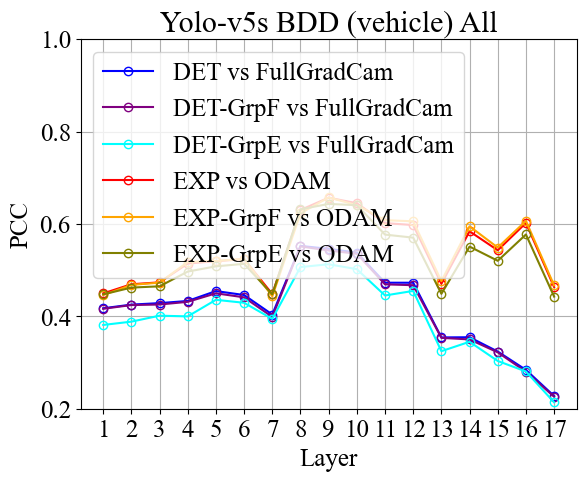

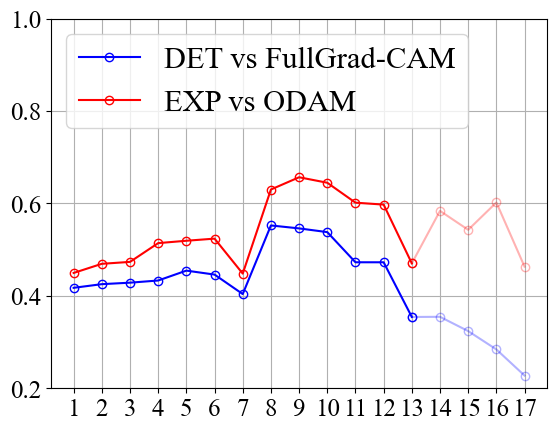

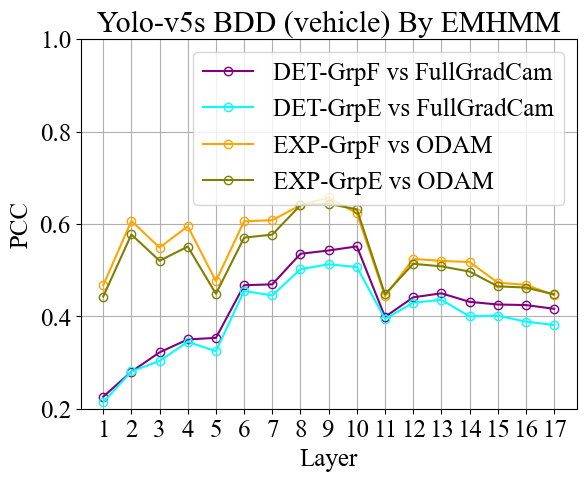

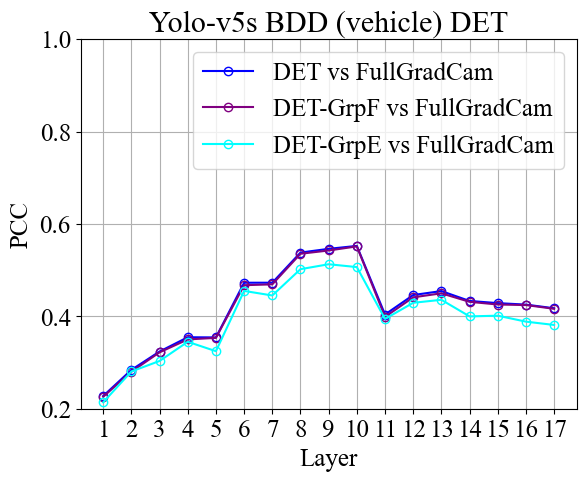

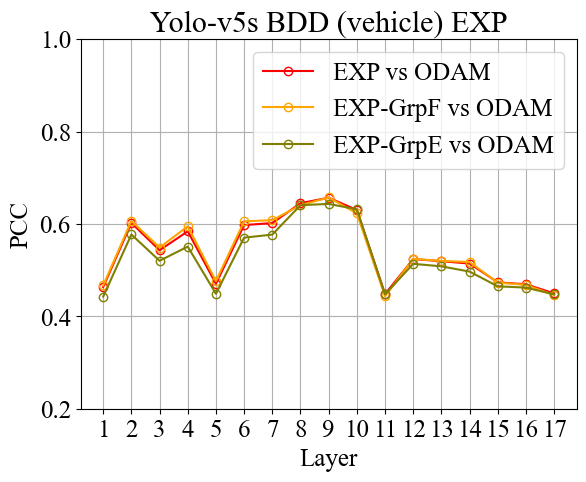

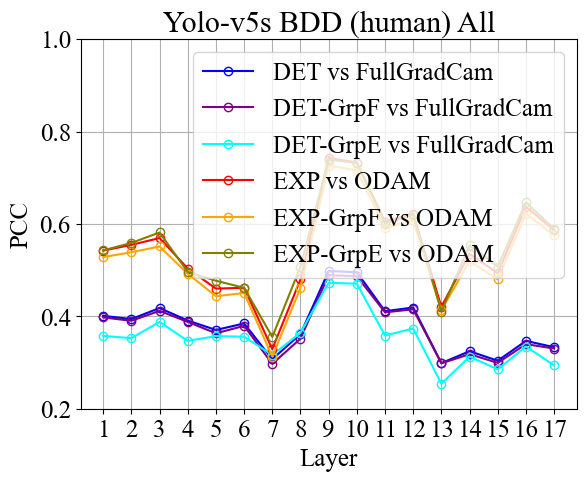

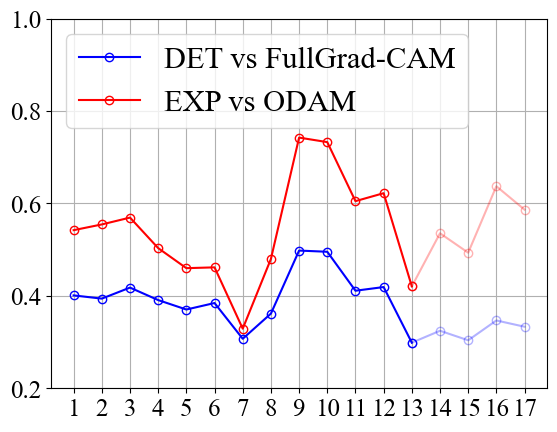

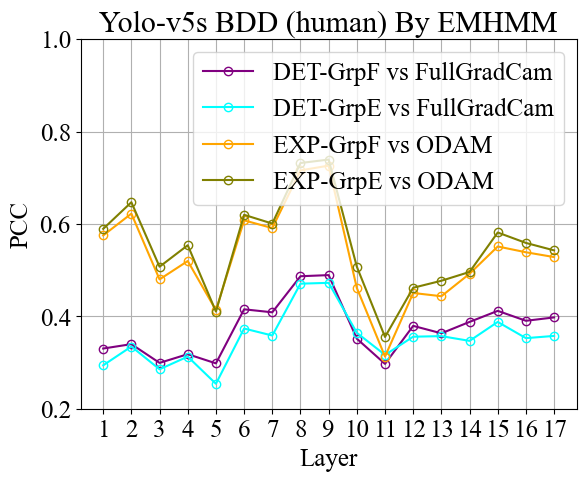

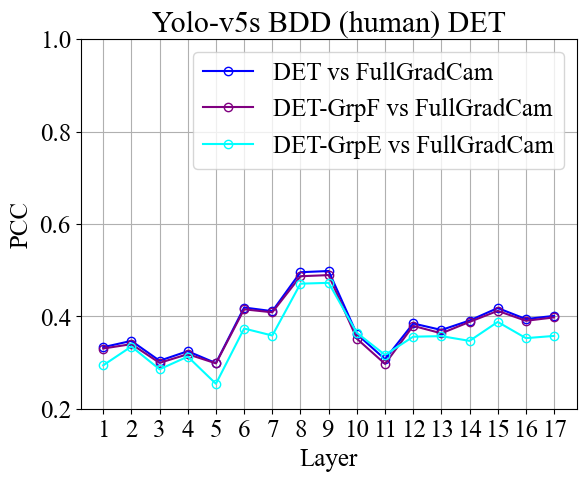

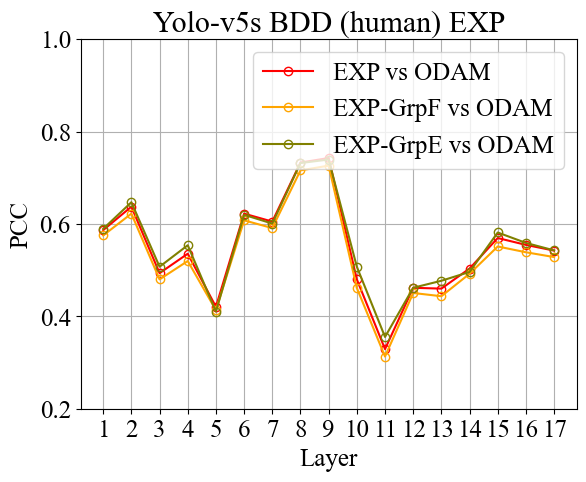

In [83]:
ylims = {
    'vehicle': (0.2,1),
    'human': (0.2,1)
}

for category in ['vehicle','human']:

    #All in one
    plt.figure()
    plt.grid()
    plt.xlabel('Layer')
    plt.ylabel('PCC')
    for analysis in PCC_all.keys():
        plt.plot(PCC_sorted[analysis][category].index[::-1], PCC_sorted[analysis][category].values, marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
    plt.xticks(PCC_sorted[analysis][category].index[::-1])
    plt.ylim(ylims[category])
    plt.title(f"Yolo-v5s BDD ({category}) All")
    plt.legend()
    plt.savefig(f'/mnt/h/jinhan/xai/results/bdd/{category}_all')
    plt.show()

    # Overall similarity
    plt.figure()
    plt.grid()
    # plt.xlabel('Layer')
    # plt.ylabel('PCC')
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["font.size"] = 18
    for analysis in ['DET vs FullGradCam','EXP vs ODAM']:
        plt.plot(PCC_sorted[analysis][category].index[::-1][0:13], PCC_sorted[analysis][category].values[0:13], marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
    plt.xticks(PCC_sorted[analysis][category].index[::-1])
    plt.ylim(ylims[category])
    # plt.title(f"Yolo-v5s BDD ({category}) By Tasks")
    plt.legend(labels=['DET vs FullGrad-CAM','EXP vs ODAM','PV vs FullGrad-CAM'], fontsize=22, loc='upper left')
    for analysis in ['DET vs FullGradCam','EXP vs ODAM']:
        plt.plot(PCC_sorted[analysis][category].index[::-1][12:18], PCC_sorted[analysis][category].values[12:18], marker='o',fillstyle='none',c=color_code[analysis],alpha=alpha)
    plt.savefig(f'/mnt/h/jinhan/xai/results/bdd/{category}_by_tasks',
                dpi=300)
    plt.show()

    # Grouped by EMHMM
    plt.figure()
    plt.grid()
    plt.xlabel('Layer')
    plt.ylabel('PCC')
    for analysis in ['DET-GrpF vs FullGradCam','DET-GrpE vs FullGradCam','EXP-GrpF vs ODAM', 'EXP-GrpE vs ODAM']:
        plt.plot(PCC_sorted[analysis][category].index, PCC_sorted[analysis][category].values, marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
    plt.xticks(PCC_sorted[analysis][category].index)
    plt.ylim(ylims[category])
    plt.title(f"Yolo-v5s BDD ({category}) By EMHMM")
    plt.legend()
    plt.savefig(f'/mnt/h/jinhan/xai/results/bdd/{category}_by_emhmm')
    plt.show()

    # DET
    plt.figure()
    plt.grid()
    plt.xlabel('Layer')
    plt.ylabel('PCC')
    for analysis in ['DET vs FullGradCam','DET-GrpF vs FullGradCam','DET-GrpE vs FullGradCam']:
        plt.plot(PCC_sorted[analysis][category].index, PCC_sorted[analysis][category].values, marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
    plt.xticks(PCC_sorted[analysis][category].index)
    plt.ylim(ylims[category])
    plt.title(f"Yolo-v5s BDD ({category}) DET")
    plt.legend()
    plt.savefig(f'/mnt/h/jinhan/xai/results/bdd/{category}_DET')
    plt.show()

    # EXP
    plt.figure()
    plt.grid()
    plt.xlabel('Layer')
    plt.ylabel('PCC')
    for analysis in ['EXP vs ODAM','EXP-GrpF vs ODAM','EXP-GrpE vs ODAM']:
        plt.plot(PCC_sorted[analysis][category].index, PCC_sorted[analysis][category].values, marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
    plt.xticks(PCC_sorted[analysis][category].index)
    plt.ylim(ylims[category])
    plt.title(f"Yolo-v5s BDD ({category}) EXP")
    plt.legend()
    plt.savefig(f'/mnt/h/jinhan/xai/results/bdd/{category}_EXP')
    plt.show()

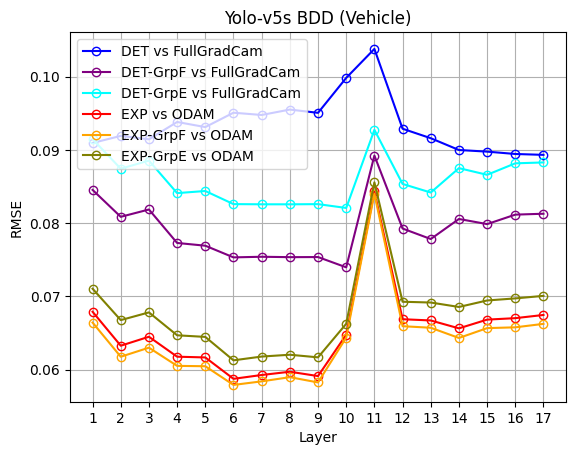

In [15]:
# Vehicle
plt.figure()
for analysis in RMSE_all.keys():
    plt.plot(RMSE_sorted[analysis]['vehicle'].index, RMSE_sorted[analysis]['vehicle'].values, marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
# plt.ylim((0.2,0.8))
plt.xticks(RMSE_sorted[analysis]['vehicle'].index)
plt.grid()
plt.legend()
plt.xlabel('Layer')
plt.ylabel('RMSE')
plt.title("Yolo-v5s BDD (Vehicle)")
plt.show()

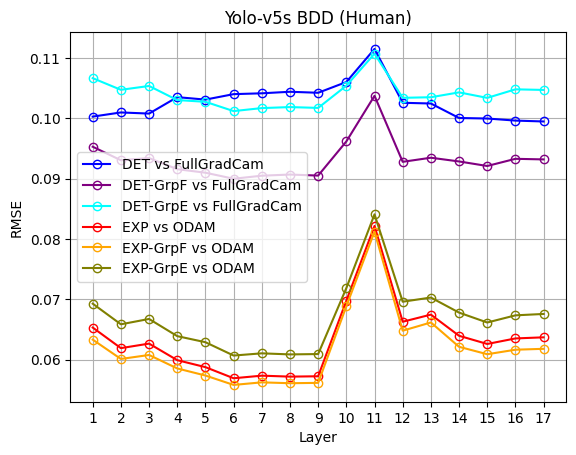

In [16]:
# Vehicle
plt.figure()
for analysis in RMSE_all.keys():
    plt.plot(RMSE_sorted[analysis]['human'].index, RMSE_sorted[analysis]['human'].values, marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
# plt.ylim((0.2,0.8))
plt.xticks(RMSE_sorted[analysis]['human'].index)
plt.grid()
plt.legend()
plt.xlabel('Layer')
plt.ylabel('RMSE')
plt.title("Yolo-v5s BDD (Human)")
plt.show()

Bar Scatter Plot

In [6]:
focused_analysis = ['DET vs FullGradCam','EXP vs ODAM']

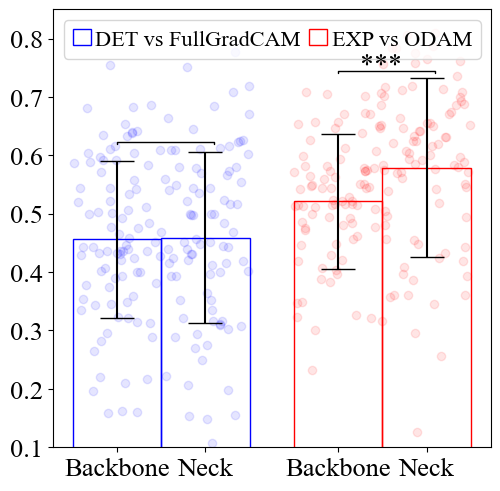

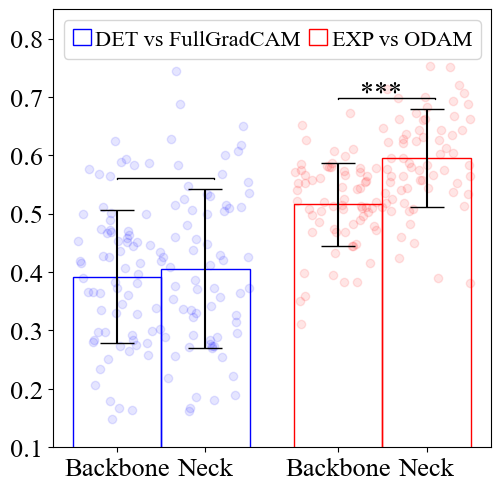

In [47]:
for category in ['vehicle','human']:
    # Bar scatter plot
    # x = np.arange(len(focused_analysis))  # the label locations
    width = 0.4  # the width of the bars
    np.random.seed(123)

    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["font.size"] = 10

    fig, ax = plt.subplots(layout='constrained')

    x_labels = ['Backbone','Neck','Backbone','Neck']
    x_labels_loc = []

    multiplier1 = 0
    offset1 = width * multiplier1

    multiplier2 = 1
    offset2 = width * multiplier2

    # Backbone
    for x, analysis in enumerate(focused_analysis):
        backbone_value = float(np.format_float_positional(np.average(backbone_pcc[category][analysis]),precision=3, unique=False, fractional=False, trim='k'))
        rects = ax.bar(x + offset1, 
                    backbone_value,
                    yerr=float(np.format_float_positional(np.std(backbone_pcc[category][analysis]),precision=3, unique=False, fractional=False, trim='k')), 
                    capsize=12,
                    width=width, 
                    color=(0,0,0,0), 
                    edgecolor=color_code[analysis], 
                    label=analysis)
        x_labels_loc.append(x+offset1)
        x_labels_loc.append(x+offset2)
        # ax.bar_label(rects, padding=3)

    for x, analysis in enumerate(focused_analysis):
        neck_value = float(np.format_float_positional(np.average(neck_pcc[category][analysis]),precision=3, unique=False, fractional=False, trim='k')),
        rects = ax.bar(x + offset2, 
            neck_value,
            yerr=float(np.format_float_positional(np.std(neck_pcc[category][analysis]),precision=3, unique=False, fractional=False, trim='k')), 
            capsize=12,
            width=width, 
            color=(0,0,0,0), 
            edgecolor=color_code[analysis], 
            label=analysis)
        # ax.bar_label(rects, padding=3)
    
    ax.legend(labels=['DET vs FullGradCAM','EXP vs ODAM'], 
              loc='upper left', ncols=3, 
              fontsize=16,
              handletextpad=0.2,
              columnspacing=0.4,
              handlelength=0.8)

    for x, analysis in enumerate(focused_analysis):
        backbone_value = float(np.format_float_positional(np.average(backbone_pcc[category][analysis]),precision=3, unique=False, fractional=False, trim='k'))
        backbone_height = backbone_value + 0.9 * np.std(backbone_pcc[category][analysis])
        neck_value = float(np.format_float_positional(np.average(neck_pcc[category][analysis]),precision=3, unique=False, fractional=False, trim='k')),
        neck_height = neck_value + 0.9 * np.std(neck_pcc[category][analysis])


        if p_values[category][analysis] < 0.001: text = "***"
        elif p_values[category][analysis] < 0.01: text = "**"
        elif p_values[category][analysis] < 0.05: text = "*"
        else: text  = ''       
        def label_diff(i,j,text,X,Y):
            x = (X[i]+X[j])/2
            y = 1.1*max(Y[i], Y[j])
            dx = abs(X[i]-X[j])

            props = {'connectionstyle':'bar','arrowstyle':'-',\
                        'shrinkA':20,'shrinkB':20,'linewidth':1}
            ax.annotate(text, xy=(X[i]*1.1,y*0.94), zorder=10, fontsize=20)
            ax.annotate('', xy=(X[i],y*0.88), xytext=(X[j],y*0.88), arrowprops=props,ha='center')

        label_diff(0,1,text,[x+offset1*0.9,x+offset2*1.1],[backbone_height,neck_height])

    for x, analysis in enumerate(focused_analysis):
        ax.scatter(x + np.random.random(len(backbone_pcc[category][analysis])) * width - width / 2, backbone_pcc[category][analysis], color=color_code[analysis],alpha=0.1)
        ax.scatter(x + offset2 + np.random.random(len(neck_pcc[category][analysis])) * width - width / 2, neck_pcc[category][analysis], color=color_code[analysis],alpha=0.1)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    # ax.set_ylabel('PCC',fontsize=20)
    # ax.set_title(f'Yolo-v5s {category.capitalize()}',fontsize=20)
    ax.set_xticks(x_labels_loc, x_labels)
    ax.tick_params(labelsize=19)
    ax.set_ylim(0.1,0.85)

    ratio = 1
    xleft, xright = ax.get_xlim()
    ybottom, ytop = ax.get_ylim()
    ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

    plt.show()
    fig.savefig(f'/mnt/h/jinhan/xai/results/bdd/bdd_{category}_bar_scatter_plot')

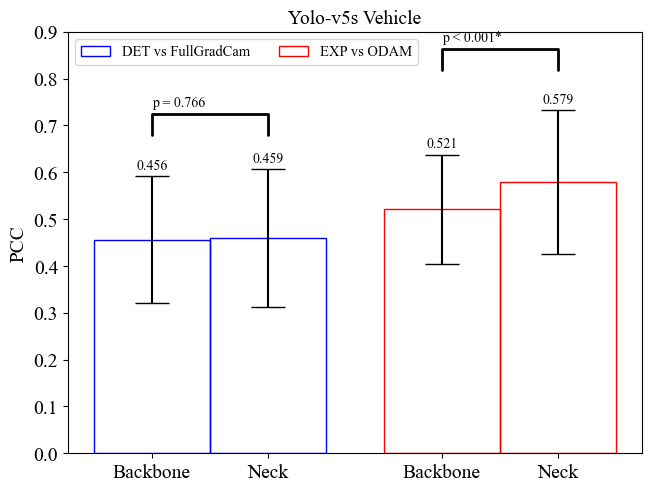

<Figure size 640x480 with 0 Axes>

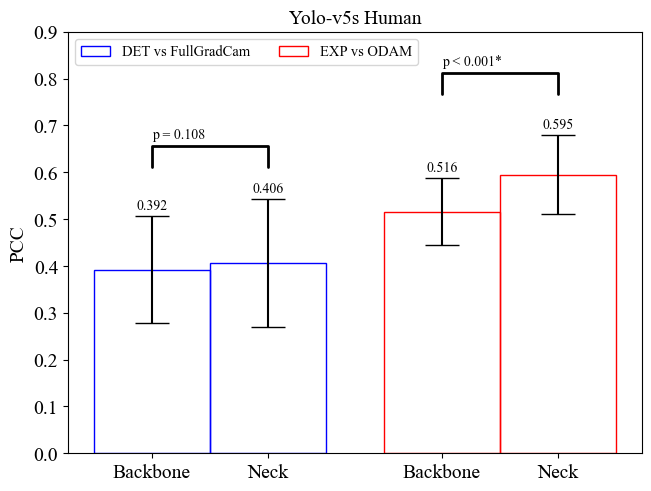

<Figure size 640x480 with 0 Axes>

In [91]:
for category in ['vehicle','human']:
    # Bar scatter plot
    # x = np.arange(len(focused_analysis))  # the label locations
    width = 0.4  # the width of the bars
    np.random.seed(123)

    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["font.size"] = 10

    fig, ax = plt.subplots(layout='constrained')

    x_labels = ['Backbone','Neck','Backbone','Neck']
    x_labels_loc = []

    multiplier1 = 0
    offset1 = width * multiplier1

    multiplier2 = 1
    offset2 = width * multiplier2

    # Backbone
    for x, analysis in enumerate(focused_analysis):
        backbone_value = float(np.format_float_positional(np.average(backbone_pcc[category][analysis]),precision=3, unique=False, fractional=False, trim='k'))
        rects = ax.bar(x + offset1, 
                    backbone_value,
                    yerr=float(np.format_float_positional(np.std(backbone_pcc[category][analysis]),precision=3, unique=False, fractional=False, trim='k')), 
                    capsize=12,
                    width=width, 
                    color=(0,0,0,0), 
                    edgecolor=color_code[analysis], 
                    label=analysis)
        x_labels_loc.append(x+offset1)
        x_labels_loc.append(x+offset2)
        ax.bar_label(rects, padding=3)

    for x, analysis in enumerate(focused_analysis):
        neck_value = float(np.format_float_positional(np.average(neck_pcc[category][analysis]),precision=3, unique=False, fractional=False, trim='k')),
        rects = ax.bar(x + offset2, 
            neck_value,
            yerr=float(np.format_float_positional(np.std(neck_pcc[category][analysis]),precision=3, unique=False, fractional=False, trim='k')), 
            capsize=12,
            width=width, 
            color=(0,0,0,0), 
            edgecolor=color_code[analysis], 
            label=analysis)
        ax.bar_label(rects, padding=3)
    
    ax.legend(labels=focused_analysis, loc='upper left', ncols=3, fontsize=10.5)

    for x, analysis in enumerate(focused_analysis):
        backbone_value = float(np.format_float_positional(np.average(backbone_pcc[category][analysis]),precision=3, unique=False, fractional=False, trim='k'))
        backbone_height = backbone_value + 0.9 * np.std(backbone_pcc[category][analysis])
        neck_value = float(np.format_float_positional(np.average(neck_pcc[category][analysis]),precision=3, unique=False, fractional=False, trim='k')),
        neck_height = neck_value + 0.9 * np.std(neck_pcc[category][analysis])


        if p_values[category][analysis] < 0.001: text = "p < 0.001*"
        elif p_values[category][analysis] < 0.05: text = f"p = {p_values[category][analysis]}*"
        else: text = f"p = {p_values[category][analysis]}"
        def label_diff(i,j,text,X,Y):
            x = (X[i]+X[j])/2
            y = 1.1*max(Y[i], Y[j])
            dx = abs(X[i]-X[j])

            props = {'connectionstyle':'bar','arrowstyle':'-',\
                        'shrinkA':10,'shrinkB':10,'linewidth':2}
            ax.annotate(text, xy=(X[i],y+0.09), zorder=10)
            ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props,ha='center')

        label_diff(0,1,text,[x+offset1,x+offset2],[backbone_height,neck_height])

    # for x, analysis in enumerate(focused_analysis):
    #     ax.scatter(x + np.random.random(len(backbone_pcc[category][analysis])) * width - width / 2, backbone_pcc[category][analysis], color=color_code[analysis],alpha=0.1)
    #     ax.scatter(x + offset2 + np.random.random(len(neck_pcc[category][analysis])) * width - width / 2, neck_pcc[category][analysis], color=color_code[analysis],alpha=0.1)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('PCC',fontsize=14)
    ax.set_title(f'Yolo-v5s {category.capitalize()}',fontsize=14)
    ax.set_xticks(x_labels_loc, x_labels)
    ax.tick_params(labelsize=14)
    ax.set_ylim(top=0.9)

    plt.show()
    plt.savefig(f'/mnt/h/jinhan/xai/results/bdd/bdd_{category}_bar_scatter_plot')

## Change Point Detection

[5, 10, 13]
[5, 10, 13]
[5, 10, 13]
[5, 10, 13]


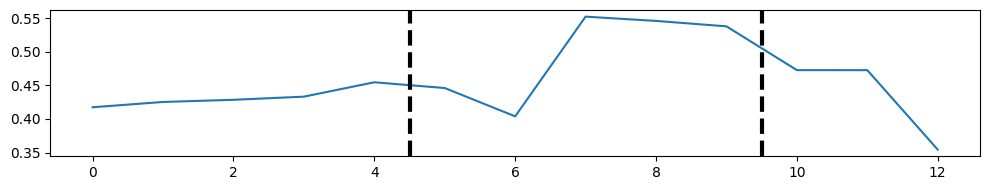

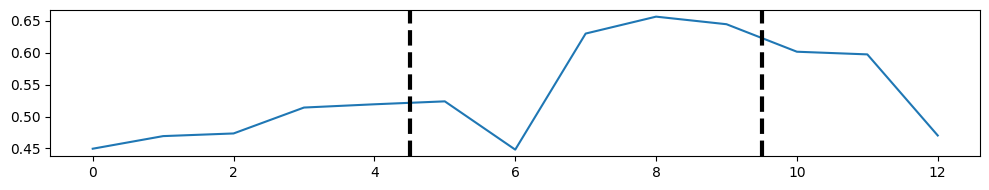

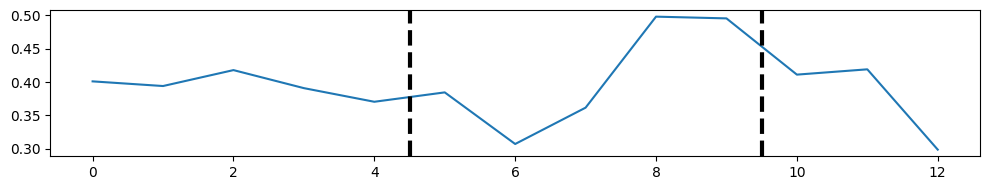

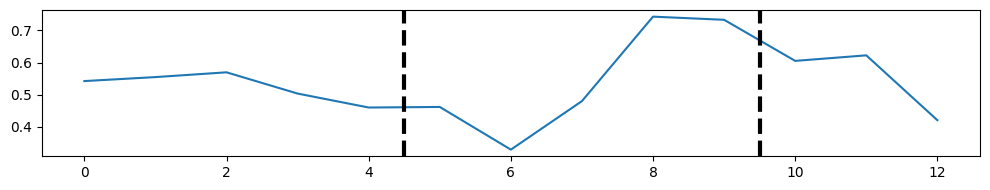

In [8]:
import ruptures as rpt

# CPD_result = defaultdict(list)
algo = rpt.Dynp(model="l2",min_size=1)
for category in ['vehicle','human']:
    for analysis in ['DET vs FullGradCam','EXP vs ODAM']:
        algo.fit(PCC_sorted[analysis][category].values[0:13])
        result = algo.predict(n_bkps=2)
        # CPD_result[analysis] = result
        print(result)
        rpt.display(PCC_sorted[analysis][category].values[0:13],[],result)

In [ ]:
for category in ['vehicle','human']:
    # Overall similarity
    plt.figure()
    plt.grid()
    # plt.xlabel('Layer')
    # plt.ylabel('PCC')
    plt.rcParams["font.family"] = "Times New Roman"
    plt.rcParams["font.size"] = 18
    for analysis in ['DET vs FullGradCam','EXP vs ODAM']:
        plt.plot(PCC_sorted[analysis][category].index[::-1][0:13], PCC_sorted[analysis][category].values[0:13], marker='o',fillstyle='none',label=analysis,c=color_code[analysis])
    plt.xticks(PCC_sorted[analysis][category].index[::-1])
    plt.ylim(ylims[category])
    # plt.title(f"Yolo-v5s BDD ({category}) By Tasks")
    plt.legend(labels=['DET vs FullGrad-CAM','EXP vs ODAM','PV vs FullGrad-CAM'], fontsize=22, loc='upper left')

    shift = 0.5
    for analysis in ['DET vs FullGradCam','EXP vs ODAM']:
        for point in change_points[analysis]:
            ylevel = ( PCC_sorted[analysis][point] + PCC_sorted[analysis][point+1] ) / 2
            plt.plot([18-point-shift,18-point-shift],[ylevel-0.02,ylevel+0.02],color=color_code[analysis],linestyle='--',linewidth=2)
        # shift -= 0.11

    for analysis in ['DET vs FullGradCam','EXP vs ODAM']:
        plt.plot(PCC_sorted[analysis][category].index[::-1][12:18], PCC_sorted[analysis][category].values[12:18], marker='o',fillstyle='none',c=color_code[analysis],alpha=alpha)
